<a href="https://colab.research.google.com/github/fahridika/DataScience/blob/Machine_Learning/insurance_stackup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import specific components from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# enhanced stats functions
from scipy import stats

# for ease of data profiling
from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.740,0,no,southeast,3756.62160
936,44,male,29.735,2,no,northeast,32108.66282
383,35,female,43.340,2,no,southeast,5846.91760
754,24,male,33.630,4,no,northeast,17128.42608
656,26,female,42.400,1,no,southwest,3410.32400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
[features for features in df.dtypes[df.dtypes != 'object'].index]

['age', 'bmi', 'children', 'charges']

In [14]:
num_features = df.dtypes[df.dtypes != 'object'].index

In [15]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [7]:
df.iloc[650]

age                49
sex            female
bmi             42.68
children            2
smoker             no
region      southeast
charges     9800.8882
Name: 650, dtype: object

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [ ]:
df['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [ ]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(clean_data, inplace=True)

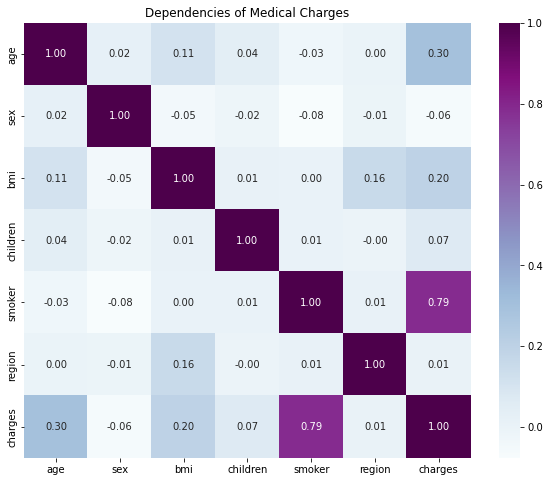

In [ ]:
corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('')
plt.show()

EDA

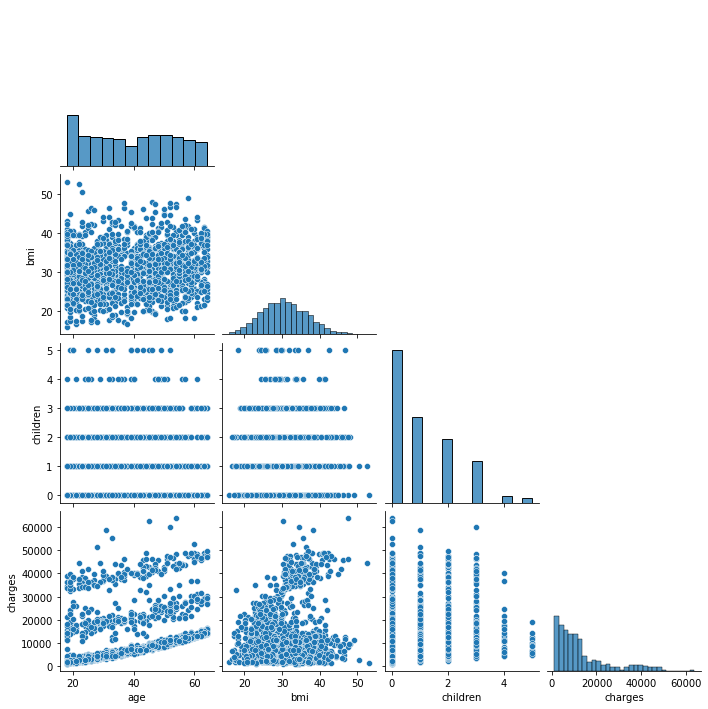

In [ ]:
sns.pairplot(df, corner=True)

# Number 5

In [ ]:
#identify duplicate rows
duplicateRows = df[df.duplicated()]
#view duplicate rows
duplicateRows

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


# EDA

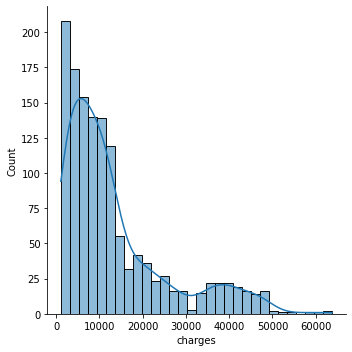

In [ ]:
sns.displot(x='charges', data=df, kde=True)

In [ ]:
plt.figure(figsize=(12,7))


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>